In [ ]:
import pandas as pd
import plotly.graph_objs as go
from datetime import time, timedelta, datetime
import mobile_traffic as mt
import numpy as np
import insee
import geopandas as gpd
from tqdm import tqdm
import webbrowser
import os
import plotting
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import geopandas as gpd

In [4]:
code_path = '/Users/anmusso/Desktop/PhD/Projects/Current/NetMob/NetMobCode/'

In [5]:
def plot_map(g, column):
    html_map = g.explore(legend=True, column=column, tiles="CartoDB positron")
    html_map.save(f'{code_path}/temp/map.html')
    webbrowser.open(f'file://{code_path}/temp/map.html')

In [40]:
file_name = 'normalized_deviation_from_mean_with_insee_data.geojson'
data_folder_path = '/Users/andrea/Desktop/PhD/Projects/Current/NetMob/NetMobData/data/FigureData/Sleep'
data = gpd.read_file(f'{data_folder_path}/{file_name}')
data.set_index('tile_insee', inplace=True)

In [41]:
data.head()

,deviation_from_mean,Men_1ind,Men_5ind,Men_prop,Men_fmp,Ind_snv,Men_surf,Men_coll,Men_mais,Log_av45,...,Ind_40_54,Ind_55_64,Ind_65_79,Ind_80p,Ind_inc,Men_pauv,Men,young,Ind,geometry
tile_insee,,,,,,,,,,,,,,,,,,,,,
CRS3035RES200mN2866000E3759200,-0.131845,-0.071910,0.152057,0.088270,-1.174810,-0.567178,-0.148952,-0.797857,0.798782,-0.831295,...,-0.423431,-1.963618,0.997495,0.593056,-0.313683,-0.308277,-0.469920,0.783356,16.0,"POLYGON ((653093.524 6838523.039, 653074.899 6..."
CRS3035RES200mN2866000E3759400,-0.126375,-1.060229,1.810499,0.372878,-0.490902,-0.641475,0.553917,-1.520806,1.329401,-0.984881,...,-0.412711,-0.397208,0.175364,-1.064360,-0.313683,-0.542713,-1.214759,1.256302,206.0,"POLYGON ((653292.693 6838542.123, 653274.068 6..."
CRS3035RES200mN2866200E3759200,-0.020221,-0.952559,-0.228270,0.932703,-0.724563,-0.394587,-0.015662,-1.548572,1.636149,-0.473418,...,-0.592524,1.496687,-0.597599,0.211904,-0.313683,-0.322304,-0.770397,0.186334,139.0,"POLYGON ((653074.899 6838721.986, 653056.273 6..."
CRS3035RES200mN2866200E3759400,0.091850,-1.063196,1.763300,-1.565291,0.534589,-1.228964,-1.005967,-0.037393,-0.802970,-0.826964,...,-0.509473,-0.596328,-0.589143,-0.566442,-0.313683,0.823394,-1.410042,1.150938,352.0,"POLYGON ((653274.068 6838741.071, 653255.443 6..."
CRS3035RES200mN2866200E3759600,0.106243,-1.280743,2.524674,-1.913128,0.775649,-1.463544,-1.083389,-0.171706,-1.045660,-1.021889,...,-0.756798,-0.924703,-0.948213,-1.243211,2.541896,0.952492,-2.112066,2.383763,498.5,"POLYGON ((653473.238 6838760.155, 653454.613 6..."


In [42]:
d = data.drop(columns='young').rename(columns={'deviation_from_mean': 'bed_time_index'})

In [44]:
d = gpd.GeoDataFrame(d)
d.to_file(f'{data_folder_path}/bed_time_index_and_normalize_vars.geojson')

In [47]:
d['Ind_snv'].describe()

count    1.515100e+04
mean     7.503586e-17
std      1.000000e+00
min     -2.098734e+00
25%     -7.612538e-01
50%     -1.916227e-01
75%      6.011365e-01
max      4.296888e+00
Name: Ind_snv, dtype: float64

In [285]:
data_poor_sleep_early = data.loc[(data['deviation_from_mean'] < 0) & (data['Ind_snv'] < -1)].copy()
data_poor = data.loc[(data['Ind_snv'] < -1)].copy()

<Axes: ylabel='Frequency'>

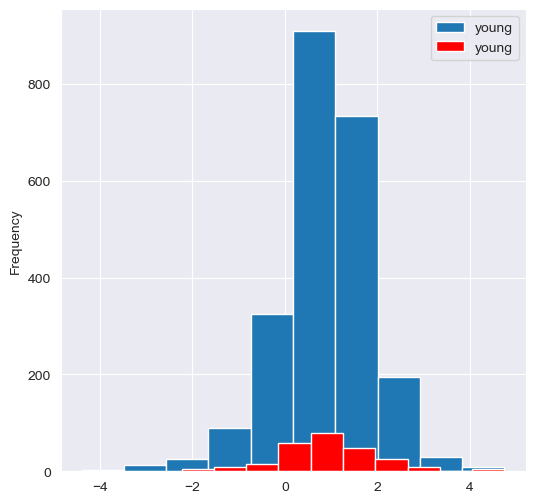

In [297]:
fig, ax = plt.subplots(figsize=(6, 6))
x_var = 'young'
data_poor.plot(ax=ax, y=x_var, kind='hist')
data_poor_sleep_early.plot(ax=ax, y=x_var, kind='hist', color='red')

In [311]:
mean_dif = (data_poor[x_var].mean() - data_poor_sleep_early[x_var].mean())
data_poor_std = data_poor[x_var].std()
data_poor_conf_int = 1.96 * data_poor_std / np.sqrt(len(data_poor))
print(f'Average difference: ({mean_dif - data_poor_conf_int:.2f}, {mean_dif + data_poor_conf_int:.2f})')

Average difference: (-0.11, -0.03)


In [ ]:
data = gpd.read_file(f'{data_folder_path}/{file_name}')